# Project: Investigate a Dataset - [No-show Appointment]_v2

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

> **This dataset collects information
from 100 k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.**
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
* Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
>**What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Loading the data, performing operations to inspect data types and looking for missing, duplicated, invalid, unnecessary or possibly errant data, then cleaing and trim the data for the exploratory phase**

In [3]:
# Loading the data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Inspecting dataframe shape.
df.shape

(110527, 14)

In [6]:
# Inspecting duplication.
df.duplicated().sum()

0

In [7]:
# Inspecting duplicated "PatientId".
df["PatientId"].duplicated().sum()

48228

In [8]:
# Inspecting duplicated "PatientId" with "No-show".
df.duplicated(["PatientId", "No-show"]).sum()

38710

In [9]:
# Inspecting  missing data and data info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# Inspecting general data statistics. 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# Extracting the row with value of -1 in Age.
mask= df.query("Age ==""-1")
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning
 

In [12]:
# Renaming "No-show" to "No_show" to overcome the AttributeError.
df.rename(columns={"No-show": "No_show"}, inplace=True)

In [13]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# Removing duplicated "PatientId" with duplicated "No-show" values.
df.drop_duplicates(["PatientId", "No_show"], inplace=True)

In [15]:
df.shape

(71817, 14)

In [16]:
# Removing the -1 row.
df.drop(index = 99832, inplace=True)

In [17]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.181600e+04,7.181600e+04,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000
mean,1.466249e+14,5.666493e+06,36.527501,0.095536,0.195068,0.070959,0.025036,0.020135,0.335566
std,2.544917e+14,7.313083e+04,23.378262,0.293956,0.396256,0.256758,0.156236,0.155338,0.472191
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175956e+12,5.631622e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.189425e+13,5.672882e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716567e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [18]:
# Cleaning data by droping "PatientId", "AppointmentID", "ScheduledDay", and "AppointmentDay".
df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"], axis = 1, inplace=True)

In [19]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> The data has been trimmed and cleaned. Now we are ready for exploration by computing statistics and creating visualizations with the goal of addressing the research questions that posed in the Introduction section.


### Dataset Statistics View

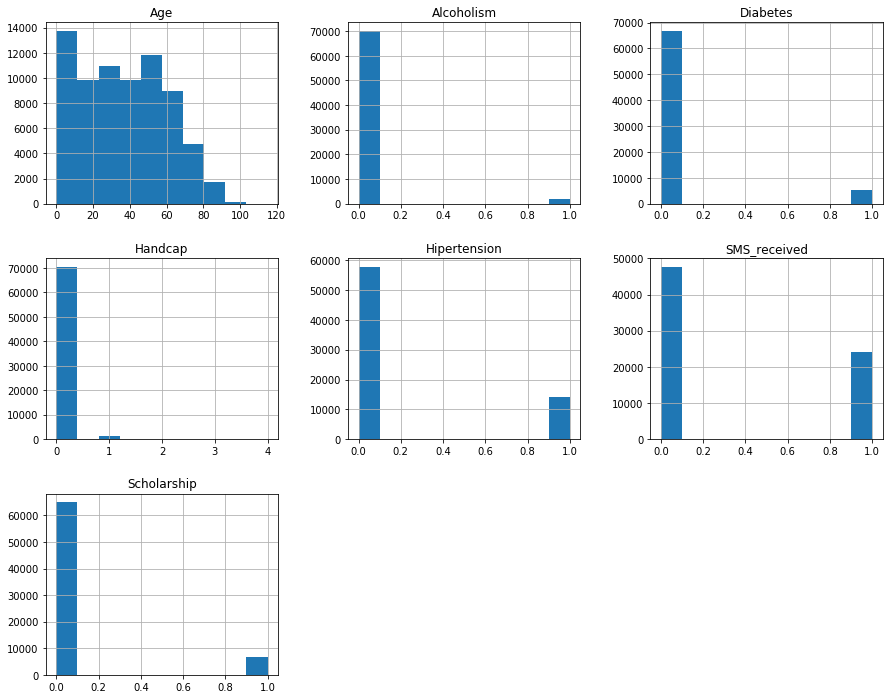

In [20]:
# Dataset histogram.
df.hist(figsize = (15, 12));

In [21]:
# Shown patients vs non-shown patients.
shown = df.No_show  == "No"
nonshow = df.No_show == "Yes"

In [22]:
df[shown].count(), df[nonshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hipertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hipertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

* Shown Patients: **54153**.
* Non-shown Patients: **17663**.

### Other Characteristics Statistics

#### 1- Gender

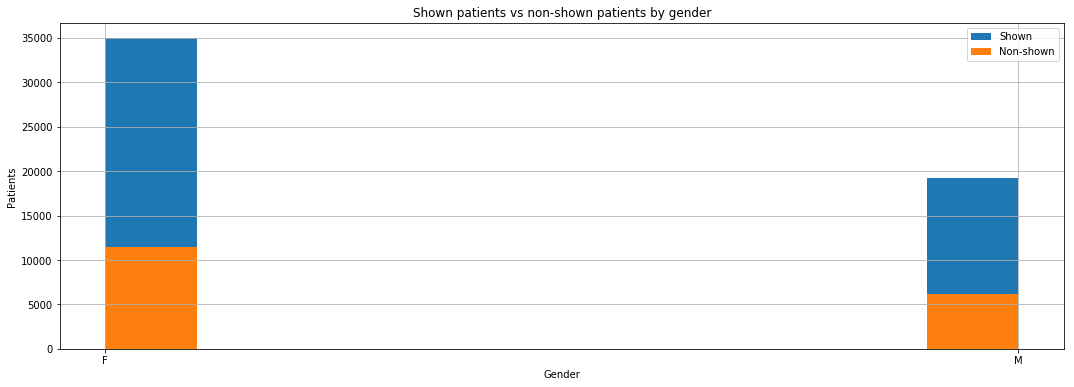

In [23]:
# Shown patients vs non-shown patients by gender.
def showing_up(df, col_name, shown_up, nonshown_up):  
    plt.figure(figsize=[18, 6])
    df[col_name][shown].hist(alpha = 1.0, label = "Shown")
    df[col_name][nonshow].hist(alpha = 1.0, label = "Non-shown")
    plt.legend()
    plt.title("Shown patients vs non-shown patients by gender")
    plt.xlabel("Gender")
    plt.ylabel("Patients")
showing_up(df, "Gender", shown, shown);

In [24]:
# Shown patients vs non-shown patients by gender.
print(df.Gender[shown].value_counts()), print(df.Gender[nonshow].value_counts()), df.groupby("Gender").No_show.value_counts()

F    34960
M    19193
Name: Gender, dtype: int64
F    11506
M     6157
Name: Gender, dtype: int64


(None, None, Gender  No_show
 F       No         34960
         Yes        11506
 M       No         19193
         Yes         6157
 Name: No_show, dtype: int64)

**Gender is insignificant factor.**

#### 2- Age

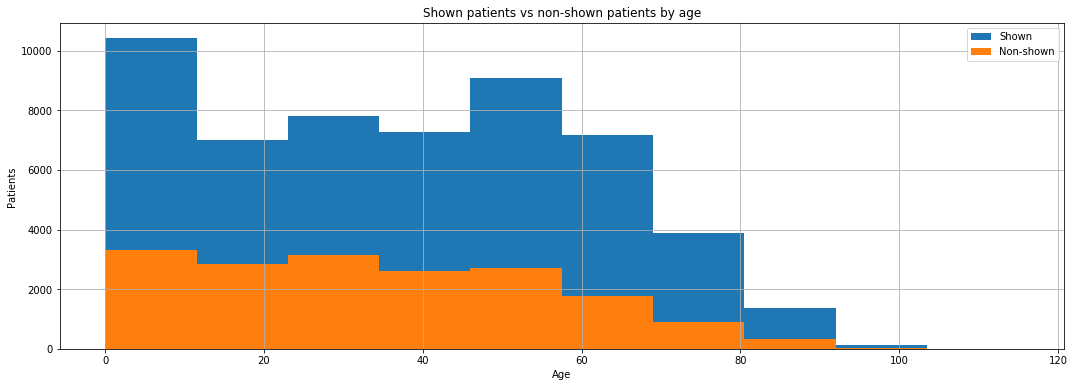

In [25]:
# Shown patients vs non-shown patients by age.
def showing_up(df, col_name, shown_up, nonshown_up):  
    plt.figure(figsize=[18, 6])
    df[col_name][shown].hist(alpha = 1.0, label = "Shown")
    df[col_name][nonshow].hist(alpha = 1.0, label = "Non-shown")
    plt.legend()
    plt.title("Shown patients vs non-shown patients by age")
    plt.xlabel("Age")
    plt.ylabel("Patients")
showing_up(df, "Age", shown, shown);

In [26]:
# Shown patients vs non-shown patients by age.
print(df.Age[shown].value_counts()), print(df.Age[nonshow].value_counts()), df.groupby("Age").No_show.value_counts()

0      1828
1      1245
2       967
3       838
57      810
       ... 
98        4
100       3
115       2
102       2
99        1
Name: Age, Length: 103, dtype: int64
0      573
1      369
17     293
19     291
22     287
      ... 
95       4
97       2
96       1
115      1
98       1
Name: Age, Length: 100, dtype: int64


(None, None, Age  No_show
 0    No         1828
      Yes         573
 1    No         1245
      Yes         369
 2    No          967
                 ... 
 99   No            1
 100  No            3
 102  No            2
 115  No            2
      Yes           1
 Name: No_show, Length: 203, dtype: int64)

**Age is significant factor.**

#### 3- Neighbourhood

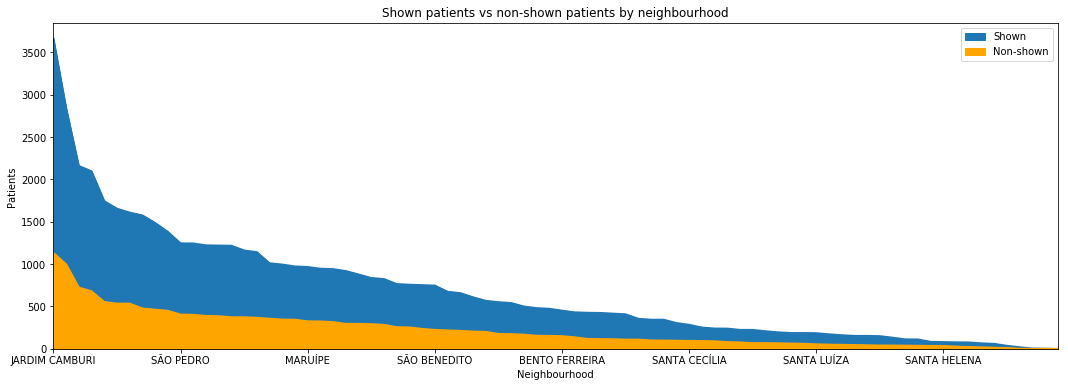

In [27]:
# Shown patients vs non-shown patients by neighbourhood.
plt.figure(figsize=[18, 6])
df.Neighbourhood[shown].value_counts().plot (kind = "area", label = "Shown")
df.Neighbourhood[nonshow].value_counts().plot (kind = "area", color = "orange",  label = "Non-shown")
plt.legend()
plt.title("Shown patients vs non-shown patients by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Patients");

In [28]:
# Shown patients vs non-shown patients by Neighbourhood.
print(df.Neighbourhood[shown].value_counts()), print(df.Neighbourhood[nonshow].value_counts()), df.groupby("Neighbourhood").No_show.value_counts()

JARDIM CAMBURI       3666
MARIA ORTIZ          2845
JARDIM DA PENHA      2160
RESISTÊNCIA          2098
ITARARÉ              1745
                     ... 
PONTAL DE CAMBURI      38
ILHA DO BOI            21
AEROPORTO               6
ILHA DO FRADE           4
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64
JARDIM CAMBURI                 1134
MARIA ORTIZ                    1000
ITARARÉ                         725
RESISTÊNCIA                     682
CENTRO                          555
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64


(None, None, Neighbourhood    No_show
 AEROPORTO        No           6
                  Yes          1
 ANDORINHAS       No         997
                  Yes        369
 ANTÔNIO HONÓRIO  No         155
                            ... 
 TABUAZEIRO       Yes        465
 UNIVERSITÁRIO    No          82
                  Yes         24
 VILA RUBIM       No         475
                  Yes        117
 Name: No_show, Length: 160, dtype: int64)

**Neighbourhood is significant factor.**

#### 4- Scholarship

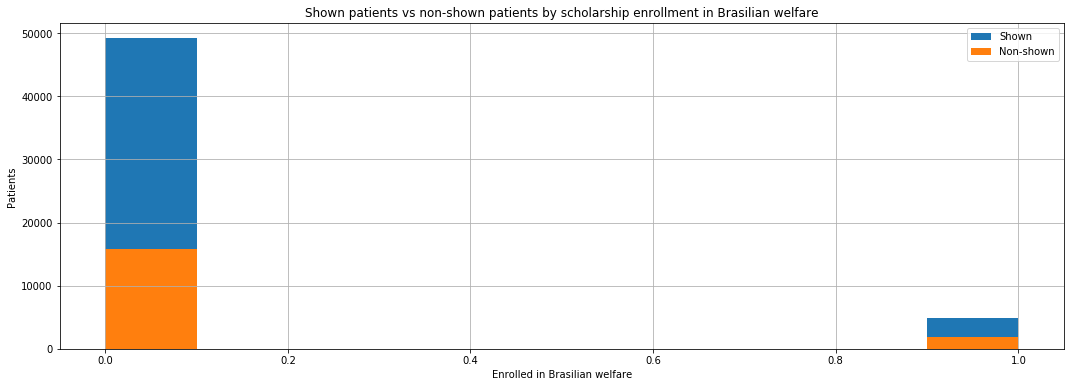

In [29]:
# Shown patients vs non-shown patients by scholarship enrollment in Brasilian welfare.
def showing_up(df, col_name, shown_up, nonshown_up):  
    plt.figure(figsize=[18, 6])
    df[col_name][shown].hist(alpha = 1.0, label = "Shown")
    df[col_name][nonshow].hist(alpha = 1.0, label = "Non-shown")
    plt.legend()
    plt.title("Shown patients vs non-shown patients by scholarship enrollment in Brasilian welfare")
    plt.xlabel("Enrolled in Brasilian welfare")
    plt.ylabel("Patients")
showing_up(df, "Scholarship", shown, shown);

In [30]:
# Shown patients vs non-shown patients by scholarship enrollment in Brasilian welfare.
print(df.Scholarship[shown].value_counts()), print(df.Scholarship[nonshow].value_counts()), df.groupby("Scholarship").No_show.value_counts()

0    49207
1     4946
Name: Scholarship, dtype: int64
0    15748
1     1915
Name: Scholarship, dtype: int64


(None, None, Scholarship  No_show
 0            No         49207
              Yes        15748
 1            No          4946
              Yes         1915
 Name: No_show, dtype: int64)

**Enrollment in Brasilian welfare is insignificant factor.**

#### 5- Hypertension

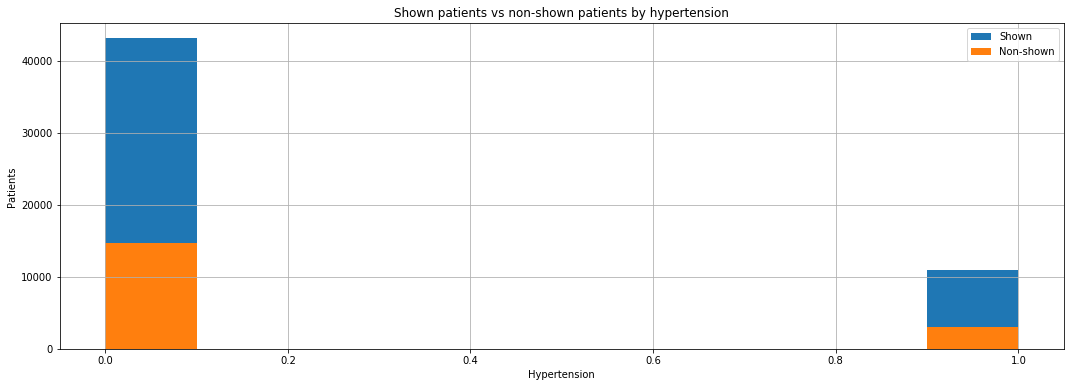

In [31]:
# Shown patients vs non-shown patients by hypertension.
def showing_up(df, col_name, shown_up, nonshown_up):  
    plt.figure(figsize=[18, 6])
    df[col_name][shown].hist(alpha = 1.0, label = "Shown")
    df[col_name][nonshow].hist(alpha = 1.0, label = "Non-shown")
    plt.legend()
    plt.title("Shown patients vs non-shown patients by hypertension")
    plt.xlabel("Hypertension")
    plt.ylabel("Patients")
showing_up(df, "Hipertension", shown, shown);

In [32]:
# Shown patients vs non-shown patients by hypertension.
print(df.Hipertension[shown].value_counts()), print(df.Hipertension[nonshow].value_counts()), df.groupby("Hipertension").No_show.value_counts()

0    43163
1    10990
Name: Hipertension, dtype: int64
0    14644
1     3019
Name: Hipertension, dtype: int64


(None, None, Hipertension  No_show
 0             No         43163
               Yes        14644
 1             No         10990
               Yes         3019
 Name: No_show, dtype: int64)

**Hypertension is insignificant factor.**

#### 6- Diabetes

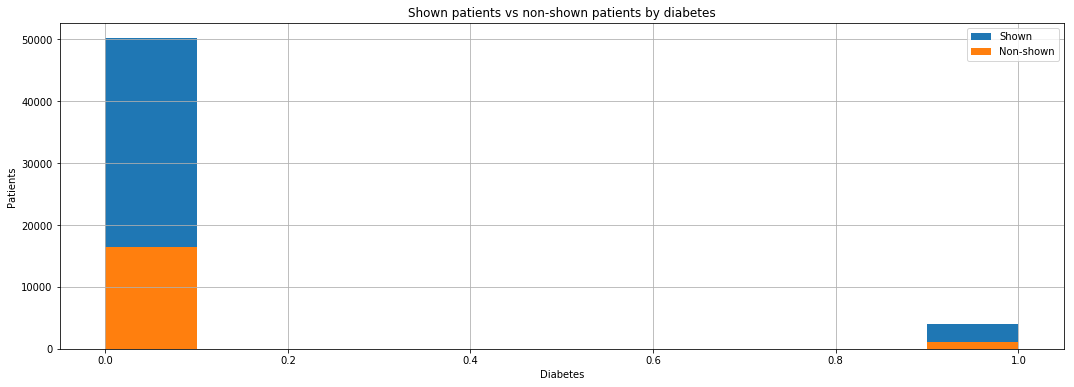

In [33]:
# Shown patients vs non-shown patients by diabetes.
def showing_up(df, col_name, shown_up, nonshown_up):  
    plt.figure(figsize=[18, 6])
    df[col_name][shown].hist(alpha = 1.0, label = "Shown")
    df[col_name][nonshow].hist(alpha = 1.0, label = "Non-shown")
    plt.legend()
    plt.title("Shown patients vs non-shown patients by diabetes")
    plt.xlabel("Diabetes")
    plt.ylabel("Patients")
showing_up(df, "Diabetes", shown, shown);

In [34]:
# Shown patients vs non-shown patients by diabetes.
print(df.Diabetes[shown].value_counts()), print(df.Diabetes[nonshow].value_counts()), df.groupby("Diabetes").No_show.value_counts()

0    50207
1     3946
Name: Diabetes, dtype: int64
0    16513
1     1150
Name: Diabetes, dtype: int64


(None, None, Diabetes  No_show
 0         No         50207
           Yes        16513
 1         No          3946
           Yes         1150
 Name: No_show, dtype: int64)

**Diabetes is insignificant factor.**

#### 7- Alcoholism

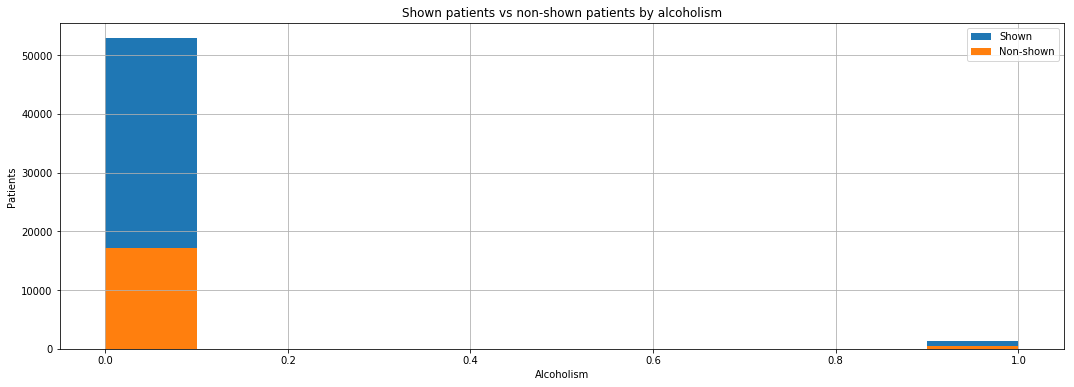

In [35]:
# Shown patients vs non-shown patients by alcoholism.
def showing_up(df, col_name, shown_up, nonshown_up):  
    plt.figure(figsize=[18, 6])
    df[col_name][shown].hist(alpha = 1.0, label = "Shown")
    df[col_name][nonshow].hist(alpha = 1.0, label = "Non-shown")
    plt.legend()
    plt.title("Shown patients vs non-shown patients by alcoholism")
    plt.xlabel("Alcoholism")
    plt.ylabel("Patients")
showing_up(df, "Alcoholism", shown, shown);

In [36]:
# Shown patients vs non-shown patients by alcoholism.
print(df.Alcoholism[shown].value_counts()), print(df.Alcoholism[nonshow].value_counts()), df.groupby("Alcoholism").No_show.value_counts()

0    52875
1     1278
Name: Alcoholism, dtype: int64
0    17143
1      520
Name: Alcoholism, dtype: int64


(None, None, Alcoholism  No_show
 0           No         52875
             Yes        17143
 1           No          1278
             Yes          520
 Name: No_show, dtype: int64)

**Alcoholism is insignificant factor.**

#### 8- Handicap

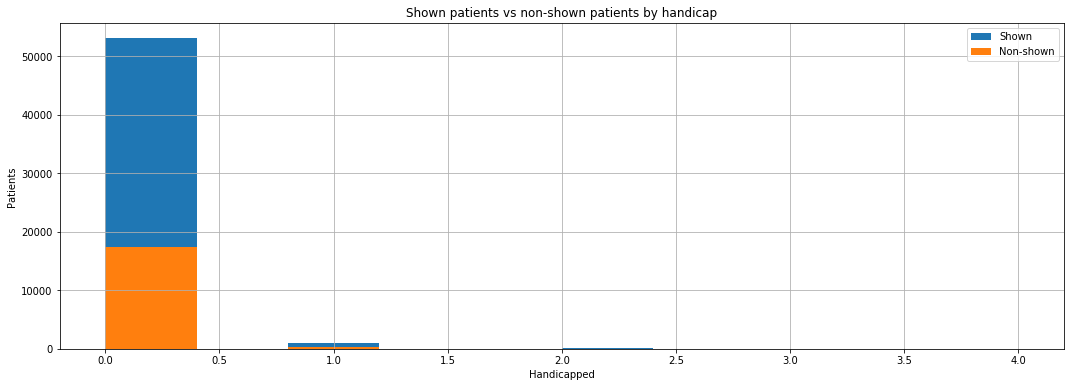

In [37]:
# Shown patients vs non-shown patients by handicap.
def showing_up(df, col_name, shown_up, nonshown_up):  
    plt.figure(figsize=[18, 6])
    df[col_name][shown].hist(alpha = 1.0, label = "Shown")
    df[col_name][nonshow].hist(alpha = 1.0, label = "Non-shown")
    plt.legend()
    plt.title("Shown patients vs non-shown patients by handicap")
    plt.xlabel("Handicapped")
    plt.ylabel("Patients")
showing_up(df, "Handcap", shown, shown);

In [38]:
# Shown patients vs non-shown patients by handicap.
print(df.Handcap[shown].value_counts()), print(df.Handcap[nonshow].value_counts()), df.groupby("Handcap").No_show.value_counts()

0    53126
1      931
2       89
3        5
4        2
Name: Handcap, dtype: int64
0    17385
1      247
2       27
3        3
4        1
Name: Handcap, dtype: int64


(None, None, Handcap  No_show
 0        No         53126
          Yes        17385
 1        No           931
          Yes          247
 2        No            89
          Yes           27
 3        No             5
          Yes            3
 4        No             2
          Yes            1
 Name: No_show, dtype: int64)

**Handcap is insignificant factor.**

#### 9- SMS_received

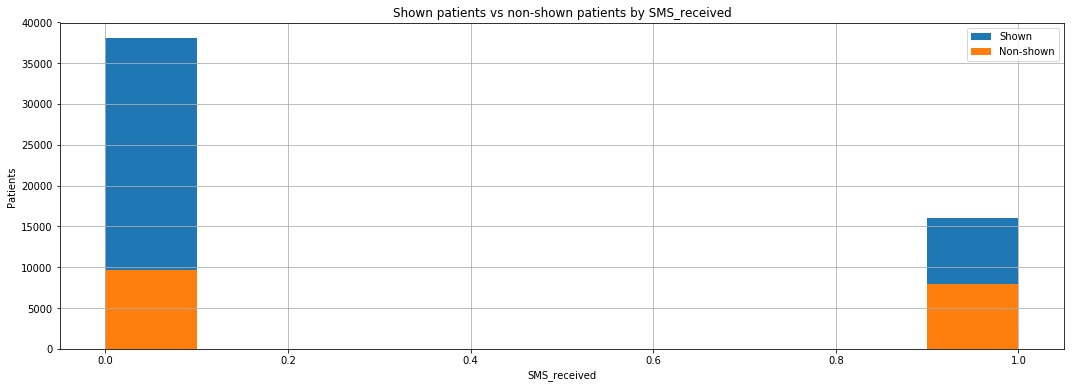

In [39]:
# Shown patients vs non-shown patients by SMS_received.
def showing_up(df, col_name, shown_up, nonshown_up):  
    plt.figure(figsize=[18, 6])
    df[col_name][shown].hist(alpha = 1.0, label = "Shown")
    df[col_name][nonshow].hist(alpha = 1.0, label = "Non-shown")
    plt.legend()
    plt.title("Shown patients vs non-shown patients by SMS_received")
    plt.xlabel("SMS_received")
    plt.ylabel("Patients")
showing_up(df, "SMS_received", shown, shown);

In [40]:
# Shown patients vs non-shown patients by SMS_received.
print(df.SMS_received[shown].value_counts()), print(df.SMS_received[nonshow].value_counts()), df.groupby("SMS_received").No_show.value_counts()

0    38057
1    16096
Name: SMS_received, dtype: int64
0    9660
1    8003
Name: SMS_received, dtype: int64


(None, None, SMS_received  No_show
 0             No         38057
               Yes         9660
 1             No         16096
               Yes         8003
 Name: No_show, dtype: int64)

**SMS_received is significant factor.**

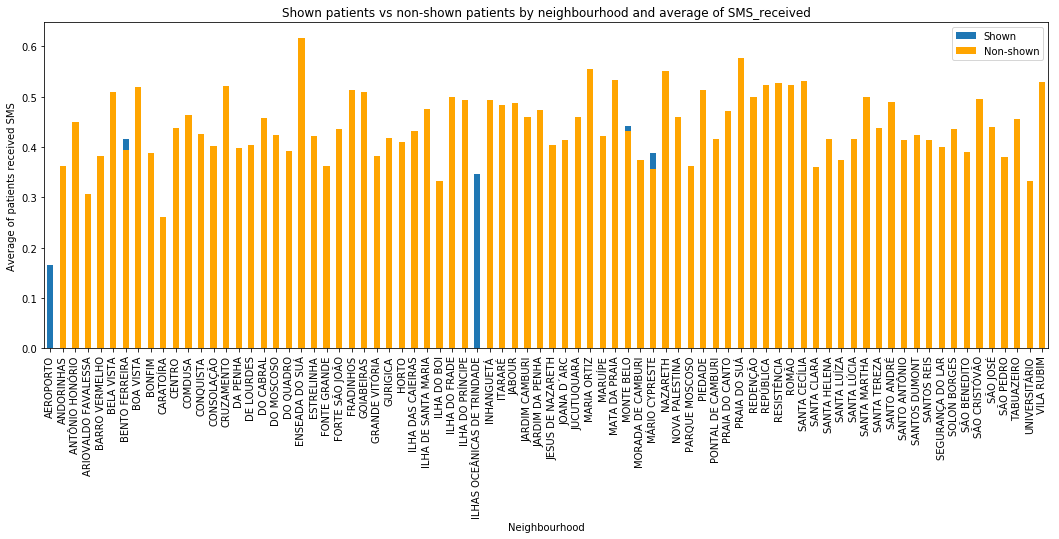

In [41]:
# Shown patients vs non-shown patients by neighbourhood and average of patients received SMS.
plt.figure(figsize=[18, 6])
df[shown].groupby("Neighbourhood").SMS_received.mean().plot (kind = "bar", label = "Shown")
df[nonshow].groupby("Neighbourhood").SMS_received.mean().plot (kind = "bar", color = "orange",  label = "Non-shown")
plt.legend()
plt.title("Shown patients vs non-shown patients by neighbourhood and average of SMS_received")
plt.xlabel("Neighbourhood")
plt.ylabel("Average of patients received SMS");

**Neighbourhood and SMS_received are significant factors in 2 neighbourhoods.**

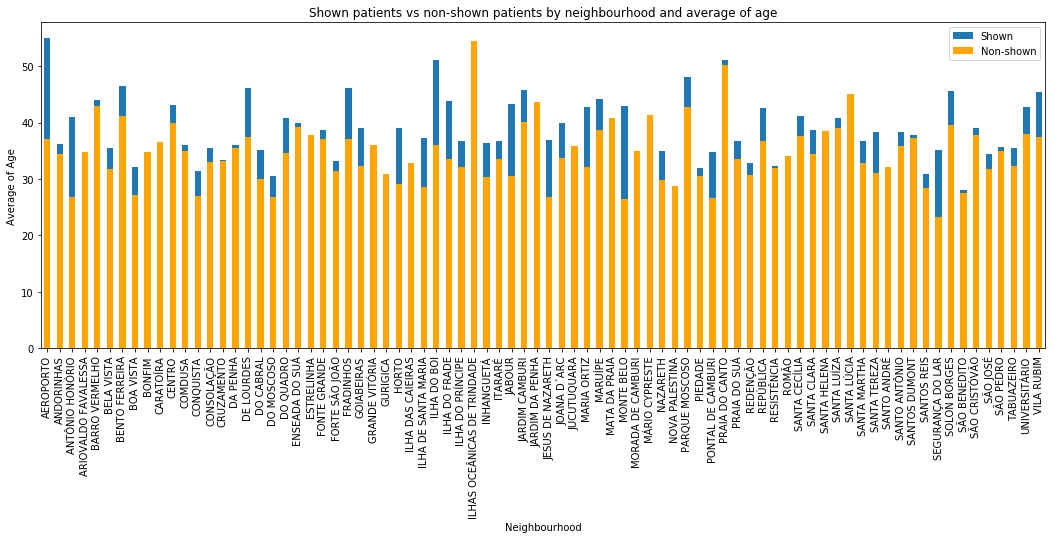

In [42]:
# Shown patients vs non-shown patients by neighbourhood and average of age.
plt.figure(figsize=[18, 6])
df[shown].groupby("Neighbourhood").Age.mean().plot (kind = "bar", label = "Shown")
df[nonshow].groupby("Neighbourhood").Age.mean().plot (kind = "bar", color = "orange",  label = "Non-shown")
plt.legend()
plt.title("Shown patients vs non-shown patients by neighbourhood and average of age")
plt.xlabel("Neighbourhood")
plt.ylabel("Average of Age");

**Neighbourhood and age are significant factors.**

<a id='conclusions'></a>
## Conclusions

>As a conclusion, the significant factors that affect the prediction of shown up patients for their scheduled appointments are:
* **Age** -  Patients in age group (0-10) has the most shown up rate followed by age group (35-75). In addition, neighborhood and age have a remarkable factor on shown up patients.
* **Neighbourhood** - Neighbourhood is the most significant factor of shown up vs. non-shown up patients in this analysis; patients from JARDIM CAMBURI are the most shown up for their scheduled appointments with 6252 patients, while AEROPORTO has one patient whom attended the scheduled appointments.
* **SMS_received** - SMS received and neighborhood have significant factor; patients received SMS in two neighborhoods were shown up for their scheduled appointments. Yet, a strange correlation was detected with SMS_received; a significant number of patients have attended their scheduled appointments without receiving SMS.


### Limitations
> No direct correlation was detected between shown up vs. non-shown up and other characteristics, such as gender, scholarship enrollment, hypertension, diabetes, alcoholism, and handicap.

 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0